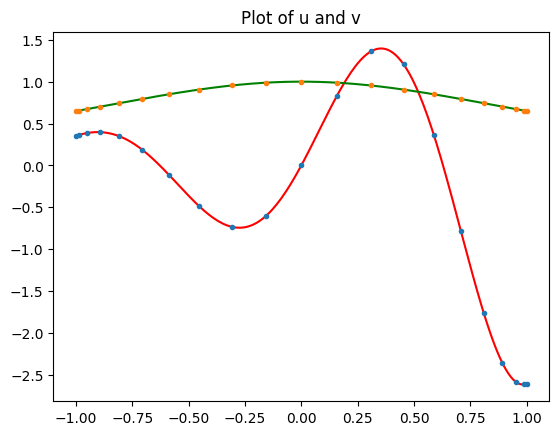

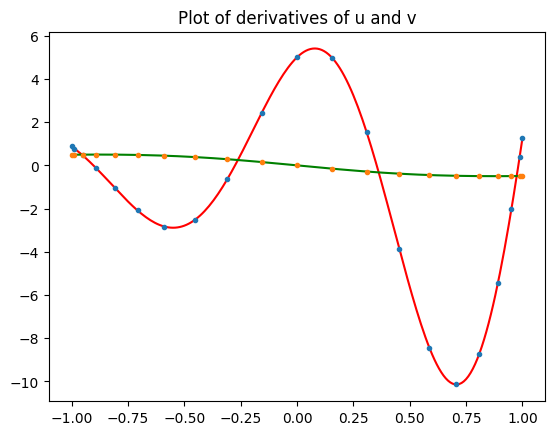

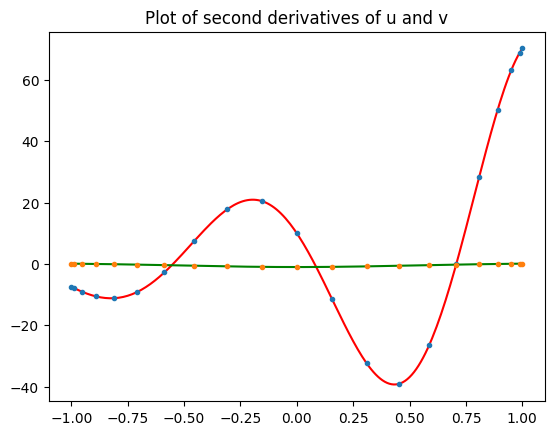

In [7]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

def sech(x):
    return 1 / np.cosh(x)

def tanh(x):
    return np.sinh(x) / np.cosh(x)

def cheb(N):
	if N==0: 
		D = 0.; x = 1.
	else:
		n = arange(0,N+1)
		x = cos(pi*n/N).reshape(N+1,1) 
		c = (hstack(( [2.], ones(N-1), [2.]))*(-1)**n).reshape(N+1,1)
		X = tile(x,(1,N+1))
		dX = X - X.T
		D = dot(c,1./c.T)/(dX+eye(N+1))
		D -= diag(sum(D.T,axis=0))
	return D, x.reshape(N+1)

x = np.arange(-1, 1.01, 0.01)
u = np.exp(x) * np.sin(5 * x)
v = sech(x)

ux = np.exp(x) * np.sin(5 * x) + 5 * np.exp(x) * np.cos(5 * x)
uxx = -24 * np.exp(x) * np.sin(5 * x) + 10 * np.exp(x) * np.cos(5 * x)
vx = -tanh(x) * sech(x)
vxx = sech(x) - 2 * (sech(x)**3)

N = 20
D, x2 = cheb(N)
D2 = np.dot(D, D)  # Second derivative matrix

u2 = np.exp(x2) * np.sin(5 * x2)
v2 = sech(x2)
u2x = np.dot(D, u2)
v2x = np.dot(D, v2)
u2xx = np.dot(D2, u2)
v2xx = np.dot(D2, v2)

plt.figure(1)
plt.plot(x, u, 'r', x2, u2, '.', x, v, 'g', x2, v2, '.')
plt.title("Plot of u and v")

plt.figure(2)
plt.plot(x, ux, 'r', x2, u2x, '.', x, vx, 'g', x2, v2x, '.')
plt.title("Plot of derivatives of u and v")

plt.figure(3)
plt.plot(x, uxx, 'r', x2, u2xx, '.', x, vxx, 'g', x2, v2xx, '.')
plt.title("Plot of second derivatives of u and v")

plt.show()

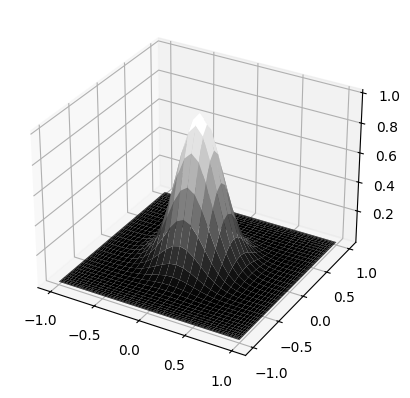

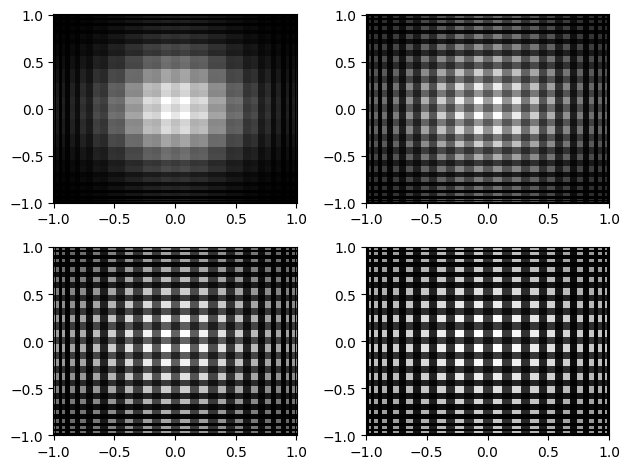

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import kron
from scipy.integrate import odeint

def cheb(N):
	if N==0: 
		D = 0.; x = 1.
	else:
		n = arange(0,N+1)
		x = cos(pi*n/N).reshape(N+1,1) 
		c = (hstack(( [2.], ones(N-1), [2.]))*(-1)**n).reshape(N+1,1)
		X = tile(x,(1,N+1))
		dX = X - X.T
		D = dot(c,1./c.T)/(dX+eye(N+1))
		D -= diag(sum(D.T,axis=0))
	return D, x.reshape(N+1)

N = 40
D, x = cheb(N)
D[N, :] = 0
D[0, :] = 0
D2 = np.dot(D, D)
y = x

I = np.eye(len(D2))
L = kron(I, D2) + kron(D2, I)  # 2D Laplacian

X, Y = np.meshgrid(x, y)
U = np.exp(-(X**2 + Y**2) / 0.1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U, cmap='gray')
plt.show()

def heatrhs2D(u, t, L, mu):
    return mu*np.dot(L, u)


fig = plt.figure(4)
u = U.reshape((N + 1) ** 2)
mu = 1
for j in range(4):
    tspan = np.array([0, 0.05])
    ysol = odeint(heatrhs2D, u, tspan, args=(L,mu))

    u = ysol[-1]

    U = u.reshape(N + 1, N + 1)

    plt.subplot(2, 2, j + 1)
    plt.pcolor(X, Y, U, cmap='gray')

plt.tight_layout()
plt.show()



In [6]:
tildeD=D[1:(N-1),1:(N-1)]